In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0306/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 1.49 s, sys: 322 ms, total: 1.82 s
Wall time: 25.5 s


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.009181,0.000000,-0.017935,0.079944,0.009551,4.965691e-01,0.012715,2.199685e-02,0.024707,...,0.0,-0.008778,0.0,-0.015795,0.0,-0.009725,0.0,0.007176,0.0,-0.006017
1,0.0,-0.004271,0.000000,-0.004557,0.000000,0.033439,3.283740e-10,0.087144,4.858496e-07,0.063389,...,0.0,-0.005281,0.0,-0.022703,0.0,-0.004794,0.0,0.010622,0.0,-0.005722
2,0.0,-0.010430,0.000000,-0.001658,0.000000,0.012973,3.668993e-05,0.157789,5.286380e-02,0.069661,...,0.0,-0.008369,0.0,-0.013511,0.0,-0.002541,0.0,0.005604,0.0,-0.004585
3,0.0,-0.002072,0.000000,0.002177,0.000008,0.006814,1.466245e-04,0.197636,7.683623e-10,0.039524,...,0.0,-0.001727,0.0,-0.009295,0.0,0.004205,0.0,0.010703,0.0,-0.004178
4,0.0,0.000132,0.055713,0.006024,0.055713,-0.005176,0.000000e+00,0.223642,0.000000e+00,0.042962,...,0.0,-0.005225,0.0,0.010862,0.0,0.008362,0.0,0.004749,0.0,-0.003000


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.000000,0.079944,4.965691e-01,2.199685e-02,3.103245e-04,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,3.283740e-10,4.858496e-07,1.226370e-09,0.000000,0.00000,0.000000,0.0,...,0.000011,0.144915,0.002174,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,3.668993e-05,5.286380e-02,1.370182e-04,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000008,1.466245e-04,7.683623e-10,0.000000e+00,0.000672,0.69062,0.002508,0.0,...,0.000000,0.000000,0.000063,4.524791e-03,3.227940e-07,0.0,0.0,0.0,0.0,0.0
4,0.0,0.055713,0.055713,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000,0.0,...,0.000000,0.001227,0.021100,1.117361e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.000000,0.083226,6.430743e-01,2.224056e-02,3.103727e-04,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,3.283740e-10,4.858497e-07,1.226370e-09,0.000000,0.000000,0.000000,0.0,...,0.000011,0.155941,0.002176,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,3.669061e-05,5.428604e-02,1.370275e-04,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000008,1.466352e-04,7.683623e-10,0.000000e+00,0.000672,0.994953,0.002511,0.0,...,0.000000,0.000000,0.000063,4.535043e-03,3.227940e-07,0.0,0.0,0.0,0.0,0.0
4,0.0,0.057295,0.057295,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.000000,0.001228,0.021324,1.117362e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    41.000009
1    41.000003
2    43.006851
3    39.997605
4    40.000000
5    32.999982
6    18.000000
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.009181,-0.017935,0.009551,0.012715,0.024707,-0.021249,-0.021658,-0.029890,-0.011039,-0.018763,...,-0.000734,0.020506,-0.001409,0.019158,0.001326,-0.008778,-0.015795,-0.009725,0.007176,-0.006017
1,-0.004271,-0.004557,0.033439,0.087144,0.063389,-0.000301,-0.011662,-0.001794,-0.023140,-0.000736,...,0.000484,0.021851,-0.001209,0.010956,-0.006891,-0.005281,-0.022703,-0.004794,0.010622,-0.005722
2,-0.010430,-0.001658,0.012973,0.157789,0.069661,0.008858,-0.013995,-0.011126,-0.016285,-0.002481,...,-0.007954,0.031073,-0.001544,0.029941,-0.014686,-0.008369,-0.013511,-0.002541,0.005604,-0.004585
3,-0.002072,0.002177,0.006814,0.197636,0.039524,0.008847,0.002386,0.021851,-0.003564,0.008196,...,0.005047,-0.006246,0.005327,0.006892,0.013744,-0.001727,-0.009295,0.004205,0.010703,-0.004178
4,0.000132,0.006024,-0.005176,0.223642,0.042962,0.000923,-0.000541,0.009435,-0.006787,-0.005159,...,0.004289,-0.011496,-0.002101,-0.025211,0.012246,-0.005225,0.010862,0.008362,0.004749,-0.003000


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.009139,-0.017775,0.009597,0.012796,0.025015,-0.021025,-0.021425,-0.029448,-0.010978,-0.018588,...,-0.000733,0.020717,-0.001408,0.019342,0.001326,-0.008740,-0.015671,-0.009678,0.007202,-0.005998
1,-0.004262,-0.004546,0.034004,0.091054,0.065442,-0.000301,-0.011595,-0.001793,-0.022875,-0.000735,...,0.000484,0.022092,-0.001208,0.011016,-0.006867,-0.005267,-0.022447,-0.004783,0.010679,-0.005706
2,-0.010375,-0.001657,0.013057,0.170919,0.072144,0.008897,-0.013897,-0.011064,-0.016153,-0.002478,...,-0.007923,0.031561,-0.001543,0.030393,-0.014578,-0.008335,-0.013420,-0.002538,0.005619,-0.004575
3,-0.002070,0.002179,0.006838,0.218519,0.040316,0.008887,0.002389,0.022091,-0.003558,0.008230,...,0.005059,-0.006226,0.005341,0.006915,0.013839,-0.001725,-0.009252,0.004214,0.010761,-0.004169
4,0.000132,0.006042,-0.005163,0.250624,0.043899,0.000923,-0.000541,0.009479,-0.006764,-0.005146,...,0.004298,-0.011430,-0.002099,-0.024896,0.012321,-0.005211,0.010921,0.008397,0.004760,-0.002996
5,0.000650,0.013539,0.015556,0.238375,0.062003,0.006269,-0.002632,0.031747,0.001841,0.006202,...,0.003424,0.012808,0.003188,-0.005217,0.020649,-0.000916,0.002507,0.000863,0.006075,-0.002981
6,-0.001686,0.018366,0.005675,0.120843,0.059506,-0.003671,0.000312,0.017364,-0.012527,0.005806,...,-0.000193,0.005034,0.000114,-0.014118,0.011004,-0.007660,0.004449,0.000730,0.005198,-0.001369


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.000000,0.000000,0.009597,0.012796,0.025015,0.000000,0.000000,0.000000,0.0,0.00000,...,0.000000,0.020717,0.000000,0.019342,0.001326,0.0,0.000000,0.000000,0.007202,0.0
1,0.000000,0.000000,0.034004,0.091054,0.065442,0.000000,0.000000,0.000000,0.0,0.00000,...,0.000484,0.022092,0.000000,0.011016,0.000000,0.0,0.000000,0.000000,0.010679,0.0
2,0.000000,0.000000,0.013057,0.170919,0.072144,0.008897,0.000000,0.000000,0.0,0.00000,...,0.000000,0.031561,0.000000,0.030393,0.000000,0.0,0.000000,0.000000,0.005619,0.0
3,0.000000,0.002179,0.006838,0.218519,0.040316,0.008887,0.002389,0.022091,0.0,0.00823,...,0.005059,0.000000,0.005341,0.006915,0.013839,0.0,0.000000,0.004214,0.010761,0.0
4,0.000132,0.006042,0.000000,0.250624,0.043899,0.000923,0.000000,0.009479,0.0,0.00000,...,0.004298,0.000000,0.000000,0.000000,0.012321,0.0,0.010921,0.008397,0.004760,0.0


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    24.037289
1    25.737191
2    28.013790
3    25.620981
4    22.790911
5    26.799093
6    23.854676
dtype: float64

In [36]:
# concatenate the sum dataframes
block_0306_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [37]:
block_0306_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [38]:
block_0306_true_and_forecasted_values_df

,True_count,Forecasted_count
0,41.000009,24.037289
1,41.000003,25.737191
2,43.006851,28.013790
3,39.997605,25.620981
4,40.000000,22.790911
5,32.999982,26.799093
6,18.000000,23.854676


In [39]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

13.737579095160964

In [40]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

12.979981875776664

In [41]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.2901053516778893, pvalue=0.5279621364183419)

In [42]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-1.8607338873753139

##### Coverages and widths for the forecasted values?

In [43]:
# for this we need the all_forecasts npy files

In [44]:
# content location is the same path as above

In [45]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [46]:
# all_forecasts_npy_files

In [47]:
# load the npy files

In [48]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 814 ms, sys: 466 ms, total: 1.28 s
Wall time: 22 s


In [49]:
len(loaded_npy_files)

910

In [50]:
loaded_npy_files[0].shape

(1000, 7)

In [51]:
loaded_npy_files[0]

array([[ 5.07593155e-04, -4.05150652e-03, -8.82911682e-03, ...,
         3.08728218e-03,  7.93933868e-04, -2.32696533e-04],
       [ 1.70612335e-03, -4.34660912e-03, -9.78672504e-03, ...,
         3.05962563e-03, -3.36170197e-05, -1.06453896e-04],
       [ 8.33153725e-04, -4.32235003e-03, -9.90134478e-03, ...,
         3.28445435e-03,  4.62532043e-04, -9.14692879e-04],
       ...,
       [-1.61279440e-02, -3.67879868e-03, -8.44812393e-03, ...,
        -3.17263603e-03,  3.81839275e-03, -7.42256641e-04],
       [-1.75313950e-02, -4.27109003e-03, -9.45860147e-03, ...,
        -9.99152660e-04,  3.06761265e-03, -2.09182501e-03],
       [-1.62425637e-02, -5.38003445e-03, -9.69368219e-03, ...,
        -2.63923407e-03,  3.17084789e-03, -2.01159716e-03]], dtype=float32)

In [52]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 24.2 ms, sys: 1.17 ms, total: 25.4 ms
Wall time: 24.6 ms


In [53]:
loaded_npy_files[0]

array([[0.00050759, 0.        , 0.        , ..., 0.00308728, 0.00079393,
        0.        ],
       [0.00170612, 0.        , 0.        , ..., 0.00305963, 0.        ,
        0.        ],
       [0.00083315, 0.        , 0.        , ..., 0.00328445, 0.00046253,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00381839,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00306761,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00317085,
        0.        ]], dtype=float32)

In [54]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [55]:
output.shape

(1000, 7)

In [56]:
output

array([[33.887245, 35.215645, 34.625046, ..., 34.431786, 34.945633,
        30.046806],
       [31.463728, 27.260643, 33.005642, ..., 29.232225, 36.2809  ,
        38.55387 ],
       [36.743443, 35.45792 , 34.11486 , ..., 35.96478 , 38.098595,
        32.14162 ],
       ...,
       [29.925514, 34.100742, 35.56485 , ..., 36.73385 , 38.80959 ,
        43.942368],
       [33.89668 , 34.098145, 44.11456 , ..., 41.56773 , 43.862247,
        38.125443],
       [27.98952 , 35.86396 , 43.477036, ..., 37.348103, 41.04962 ,
        39.735405]], dtype=float32)

In [57]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [58]:
output_alt.shape

(1000, 7)

In [59]:
output_alt

array([[33.887245, 35.215645, 34.625046, ..., 34.431786, 34.945633,
        30.046806],
       [31.463728, 27.260643, 33.005642, ..., 29.232225, 36.2809  ,
        38.55387 ],
       [36.743443, 35.45792 , 34.11486 , ..., 35.96478 , 38.098595,
        32.14162 ],
       ...,
       [29.925514, 34.100742, 35.56485 , ..., 36.73385 , 38.80959 ,
        43.942368],
       [33.89668 , 34.098145, 44.11456 , ..., 41.56773 , 43.862247,
        38.125443],
       [27.98952 , 35.86396 , 43.477036, ..., 37.348103, 41.04962 ,
        39.735405]], dtype=float32)

In [60]:
np.mean(output_alt == output)

1.0

In [61]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [62]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [63]:
li_train

array([[22.50752168],
       [22.31606421],
       [22.86141582],
       [23.41199365],
       [21.60777588],
       [23.40833941],
       [22.04813304]])

In [64]:
ui_train

array([[40.464814  ],
       [40.77926407],
       [43.92694111],
       [45.8095953 ],
       [42.21499987],
       [44.63247185],
       [44.50019484]])

In [65]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [66]:
avg_width_train

20.59529104913984

In [67]:
y_traina = block_0306_true_and_forecasted_values_df[["True_count"]].values

In [68]:
y_traina

array([[41.00000903],
       [41.00000334],
       [43.00685138],
       [39.99760478],
       [40.00000026],
       [32.99998226],
       [17.99999986]])

In [69]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [70]:
coverage_train

0.5714285714285714

In [71]:
np.mean(output, axis = 0)

array([31.081625, 31.243902, 32.96424 , 33.749077, 30.53642 , 33.65258 ,
       32.36548 ], dtype=float32)

In [72]:
sum_forecasted_values

0    24.037289
1    25.737191
2    28.013790
3    25.620981
4    22.790911
5    26.799093
6    23.854676
dtype: float64

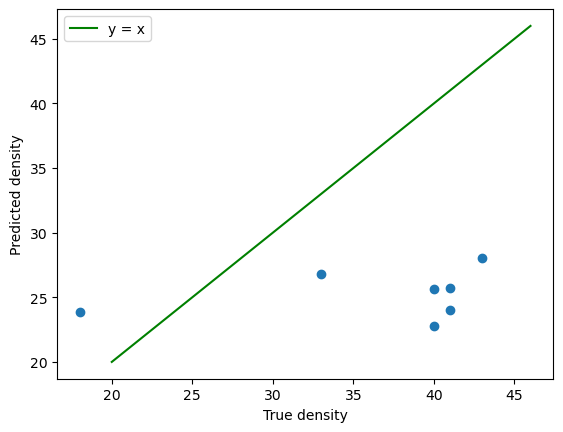

In [73]:
plt.scatter(block_0306_true_and_forecasted_values_df['True_count'], block_0306_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([20, 46], [20, 46], color='green', label='y = x')
plt.legend()
plt.show()

In [ ]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [ ]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [ ]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 